In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Load the dataset
df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Documents\\Mini project\\Brain stroke prediction\\data\\stroke_data.csv")
df.head()

,age,gender,bmi,avg_glucose_level,hypertension,heart_disease,stroke
0,67,Male,36.6,228.69,0,1,1
1,80,Male,32.5,105.92,0,1,1
2,49,Female,34.4,171.23,0,0,1
3,79,Female,24.0,174.12,1,0,1
4,81,Male,29.0,186.21,0,0,1


In [48]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   int64  
 1   gender             4981 non-null   object 
 2   bmi                4981 non-null   float64
 3   avg_glucose_level  4981 non-null   float64
 4   hypertension       4981 non-null   int64  
 5   heart_disease      4981 non-null   int64  
 6   stroke             4981 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 272.5+ KB


In [49]:
# Check for missing values
df.isnull().sum()

age                  0
gender               0
bmi                  0
avg_glucose_level    0
hypertension         0
heart_disease        0
stroke               0
dtype: int64

In [50]:
# Fill missing BMI values with the mean BMI
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

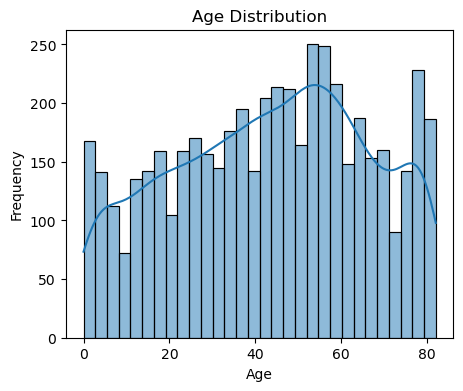

In [51]:
# Distribution of age
plt.figure(figsize=(5, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

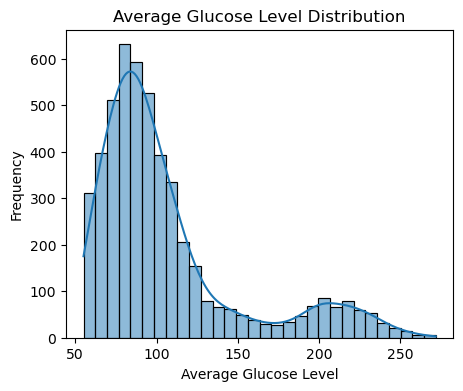

In [52]:
# Distribution of average glucose level
plt.figure(figsize=(5, 4))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

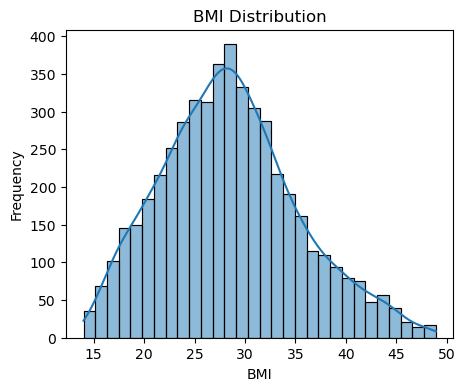

In [53]:
# Distribution of BMI
plt.figure(figsize=(5, 4))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

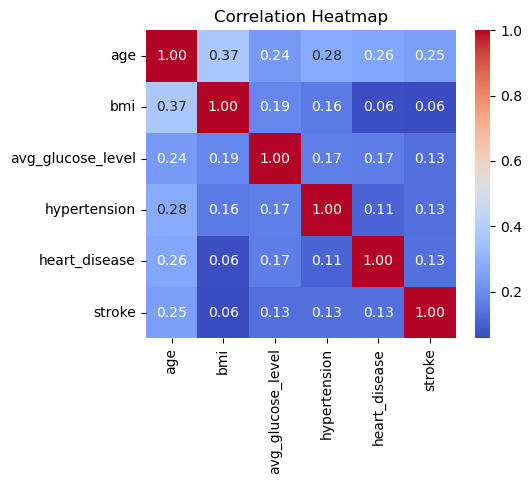

In [54]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(5, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# Convert gender to numeric
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Select only needed features
X = df[['age', 'gender', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']]
y = df['stroke']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Make predictions
y_pred = model.predict(X_test)

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [61]:
accuracy, conf_matrix, class_report

(0.9458375125376128,
 array([[943,   0],
        [ 54,   0]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       943\n           1       0.00      0.00      0.00        54\n\n    accuracy                           0.95       997\n   macro avg       0.47      0.50      0.49       997\nweighted avg       0.89      0.95      0.92       997\n')